# Estimation on real data using MSM

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import matplotlib.pyplot as plt

# Singles

In [291]:
moments = pd.read_excel('SASdata/single_moments.xlsx')
mom_data = moments['Moments'].to_numpy()
mom_se = moments['SE'].to_numpy()
weight = SMD.weight_matrix_single(mom_se)

Weight matrix

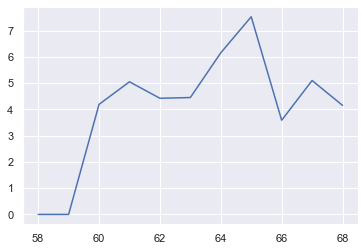

In [292]:
plt.plot(np.arange(58,69),np.mean(np.diag(weight).reshape(11,8),axis=1))

### Set up estimation

In [214]:
Single = RetirementClass(simN=int(5e5), simT=68-57+1)
Single.solve()
Single.simulate()

In [215]:
# function to generate moments
def mom_fun(sim):
    return SMD.MomFunSingle(sim,Single.par)

In [216]:
add_str = '_est'
est_par = ("alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta")
est_par_tex = (r'$\alpha_0^m$', r'$\alpha_0^f$', r'$\alpha_1$', r'$\sigma$')
fixed_par = ('R', 'rho', 'beta', 'gamma', 
             'priv_pension_male', 'priv_pension_female', 'g_adjust', 'pi_adjust_m', 'pi_adjust_f')
fixed_par_tex = (r'$R$', r'$\rho$', r'$\beta$', r'$\gamma$', 
                 r'$PPW^m$', r'$PPW^f$', r'$g$', r'$\pi_m$', r'$\pi_f$')

# Setup estimation
smd = SMD.SimulatedMinimumDistance(Single,mom_data,mom_fun)
smd.est_par = est_par

### Estimate

In [6]:
theta0 = [(0.1, 0.1, 0.1, 0.5),
          (0.5, 0.5, 0.2, 0.5),
          (1.0, 1.0, 0.3, 0.5),
          (0.1, 0.1, -0.1, 0.5),
          (0.5, 0.5, -0.2, 0.5),
          (1.0, 1.0, -0.3, 0.5)]

In [10]:
smd.MultiStart(theta0,weight)
theta = smd.est
#theta = np.array([0.48704889, 0.50153614, -0.16117956, 0.267018 ])

### Results

In [14]:
Nobs = 500
smd.std_error(theta,weight,Nobs=Nobs,Nsim=Single.par.simN/Nobs)
std_error = smd.std
print('Parameters:', np.round(theta,3))
print('Std error :', np.round(std_error,4))
SMD.save_est(est_par,theta,name='Single') # save parameters

Parameters: [ 0.487  0.502 -0.161  0.267]
Std error : [0.0005 0.0012 0.0002 0.0003]


### Model fit

In [ ]:
smd.obj_fun(theta,weight) # set theta as parameters

In [217]:
#for p in range(len(est_par)):
#    setattr(Single.par,est_par[p],theta[p]) 
#Single.solve()
#Single.simulate()

In [16]:
def mom_data_total(MA):
    data = pd.read_excel('SASdata/single_moments_total.xlsx')
    mom = np.reshape(data['Moments'].to_numpy(), newshape=(int(len(data)/3),3), order='F')
    if len(MA)>1:
        return mom[:,-1]
    else:
        return mom[:,MA[0]]
    
def model_fit(MA):
    G_data = {'y': [mom_data_total(MA=MA)], 'x': np.arange(58,69), 'label': ['Data'], 'color': 'k', 
              'linestyle': ['None'], 'marker': 'o'}
    G_pred = figs.retirement_probs(Single,MA=MA)
    #G_pred['color'] = 'red'
    return [G_data,G_pred]

Women

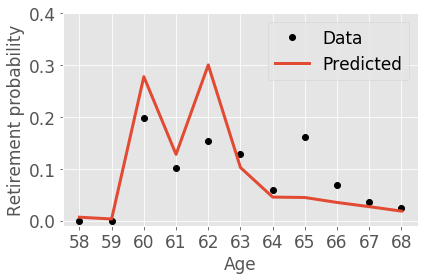

In [17]:
figs.MyPlot(model_fit([0]),ylim=[-0.01,0.4],linewidth=3,save=True).savefig('figs/ModelFit/SingleWomen.png')

Men

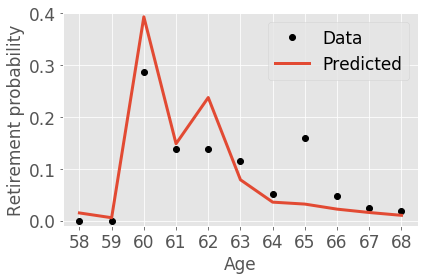

In [18]:
figs.MyPlot(model_fit([1]),ylim=[-0.01,0.4],linewidth=3,save=True).savefig('figs/ModelFit/SingleMen.png')

### Sensitivity to first step calibrated parameters

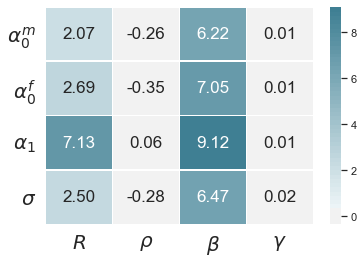

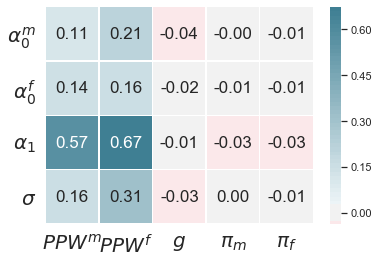

In [230]:
smd.recompute=True
smd.sensitivity(theta,weight,fixed_par)
figs.sens_fig_tab(smd.sens2[:,:4],smd.sens2e[:,:4],theta,est_par_tex,fixed_par_tex[:4])
figs.sens_fig_tab(smd.sens2[:,4:],smd.sens2e[:,4:],theta,est_par_tex,fixed_par_tex[4:])

### Clean up

In [ ]:
%reset -f

# Couples

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
moments = pd.read_excel('SASdata/couple_moments.xlsx')
mom_data = moments['Moments'].to_numpy()
mom_se = moments['SE'].to_numpy()
weight = SMD.weight_matrix_couple(mom_se)

Weight matrix

In [ ]:
plt.plot(np.arange(58,69),np.mean(np.diag(weight).reshape(2,11,25),axis=(0,2))

### Set up estimation

In [ ]:
Couple = RetirementClass(simN=int(1e6), simT=68-53+1)
Couple.solve()
Couple.simulate()

In [ ]:
# function to generate moments
def mom_fun(sim):
    return SMD.MomFunCouple(sim,Couple.par)

In [ ]:
add_str = '_est'
est_par = ("alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta", "phi_0_male", "phi_0_female", "phi_1")
est_par_tex = (r'$\alpha_0^m$', r'$\alpha_0^f$', r'$\alpha_1$', r'$\sigma$', r'$\phi_0^m$', r'$\phi_0^f$', r'$\phi_1$')
fixed_par = ('R', 'rho', 'beta', 'gamma', 'v',
             'priv_pension_male', 'priv_pension_female', 'g_adjust', 'pi_adjust_m', 'pi_adjust_f')
fixed_par_tex = (r'$R$', r'$\rho$', r'$\beta$', r'$\gamma$', r'$v$', 
                 r'$PPW^m$', r'$PPW^f$', r'$g$', r'$\pi_m$', r'$\pi_f$')

# Setup estimation
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun)
smd.est_par = est_par
#smd.options['adaptive'] = True

### Estimate

In [ ]:
theta0 = [(0.4, 0.4, -0.1, 0.5, 1.1, 1.5, 0.5),
          (0.4, 0.4, -0.1, 0.5, 1.5, 1.1, -0.5),
          (0.4, 0.4, -0.1, 0.5, 1.5, 1.5, 0.5),
          (0.2, 0.2, -0.2, 0.5, 0.5, 1.1, -0.5),
          (0.4, 0.4, -0.1, 0.5, 1.5, 0.5, 0.5),
          (0.1, 0.1, -0.1, 0.5, 1.1, 1.5, -0.5),
          (0.6, 0.6, 0.1, 0.5, 1.1, 1.5, 0.5),
          (1.0, 1.0, 0.2, 0.5, 0.5, 0.5, -0.5),
          (0.2, 1.0, 0.3, 0.5, 2.0, 0.5, 0.5),
          (1.0, 0.2, 0.4, 0.5, 0.5, 2.0, -0.5)]

In [ ]:
smd.print_iter = [True,100] # print every 100 function eval
smd.MultiStart(theta0,weight)
theta = smd.est
#theta = np.array([?])

### Results

In [ ]:
Nobs = 500
smd.std_error(theta,weight,Nobs=Nobs,Nsim=Couple.par.simN/Nobs)
std_error = smd.std
print('Parameters:', np.round(theta,3))
print('Std error :', np.round(std_error,4))
SMD.save_est(est_par,theta,name='Couple',couple=True) # save parameters

### Model fit

In [ ]:
smd.obj_fun(theta,weight) # set theta as parameters

def mom_data_total(MA):
    data = pd.read_excel('SASdata/couple_moments_total.xlsx')
    mom = np.reshape(data['Moments'].to_numpy(), newshape=(int(len(data)/3),3), order='F')
    if len(MA)>1:
        return mom[:,-1]
    else:
        return mom[:,MA[0]]
    
def model_fit(MA):
    G_data = {'y': [mom_data_total(MA=MA)], 'x': np.arange(58,69), 'label': ['Data'], 'color': 'k', 
              'linestyle': ['None'], 'marker': 'o'}
    G_pred = figs.retirement_probs(Couple,MA=MA)
    #G_pred['color'] = 'red'
    return [G_data,G_pred]

Women

Men

### Sensitivity to first step calibrated parameters

In [ ]:
smd.recompute=True
smd.sensitivity(theta,weight,fixed_par)
figs.sens_fig_tab(smd.sens2[:,:5],smd.sens2e[:,:5],theta,est_par_tex,fixed_par_tex[:5])
figs.sens_fig_tab(smd.sens2[:,5:],smd.sens2e[:,5:],theta,est_par_tex,fixed_par_tex[5:])

# Restricted Couple model

In [ ]:
Couple.par.phi_0_male = 0
Couple.par.phi_0_female = 0
Couple.par.phi_1 = 0
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun)
smd.est_par = est_par[0:4]
#smd.options['adaptive'] = True

### Estimate

In [ ]:
theta0 = [(0.2, 0.2, -0.1, 0.5),
          (0.5, 0.5, 0.1, 0.5),
          (1.0, 1.0, 0.5, 0.5),
          (1.5, 1.5, -0.5, 0.5),
          (0.5, 0.5, -0.1, 0.5)]

In [ ]:
smd.print_iter = [True,100] # print every 100 function eval
smd.MultiStart(theta0,weight)
theta = smd.est
#theta = np.array([?])

### Results

In [ ]:
Nobs = 500
smd.std_error(theta,weight,Nobs=Nobs,Nsim=Couple.par.simN/Nobs)
std_error = smd.std
print('Parameters:', np.round(theta,3))
print('Std error :', np.round(std_error,4))
SMD.save_est(est_par,theta,name='RestCouple',couple=True) # save parameters